In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 50

In [3]:
ny_houses = pd.read_csv("ny_houses_clean.csv")

In [4]:
ny_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   broker         4584 non-null   object 
 1   locality       4584 non-null   object 
 2   suburb         4584 non-null   object 
 3   zip_code       4584 non-null   int64  
 4   type           4584 non-null   object 
 5   price          4584 non-null   int64  
 6   propertysqft   4584 non-null   float64
 7   beds           4584 non-null   int64  
 8   bath           4584 non-null   float64
 9   cost_per_sqft  4584 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 358.3+ KB


In [5]:
ny_houses

,broker,locality,suburb,zip_code,type,price,propertysqft,beds,bath,cost_per_sqft
0,Douglas Elliman,New York County,New York,10022,Condo,315000,1400.00,2,2.00,225.00
1,Serhant,New York County,New York,10019,Condo,195000000,17545.00,7,10.00,11114.28
2,Sowae Corp,Richmond County,Staten Island,10312,House,260000,2015.00,4,2.00,129.03
3,Compass,New York County,New York,10022,Condo,69000,445.00,3,1.00,155.06
4,Sotheby's International Realty,New York County,New York,10065,Townhouse,55000000,14175.00,7,2.37,3880.07
...,...,...,...,...,...,...,...,...,...,...
4579,Compass,New York County,New York,10075,Co-op,599000,2184.21,1,1.00,274.24
4580,Mjr Real Estate Llc,Queens County,Rego Park,11374,Co-op,245000,2184.21,1,1.00,112.17
4581,Douglas Elliman,New York County,New York,10011,Co-op,1275000,2184.21,1,1.00,583.74
4582,E Realty International Corp,Queens County,Elmhurst,11373,Condo,598125,655.00,2,1.00,913.17


# Locality Breakdown

In [6]:
ny_houses = ny_houses.loc[ny_houses["locality"] != "Nassau County"].reset_index(drop=True)

In [7]:
locality_agg = ny_houses.groupby("locality").agg(
    total_properties=("zip_code", "count"),
    avg_price=("price", "mean"),
    avg_size=("propertysqft", "mean"),
    avg_beds=("beds", "mean"),
    max_price=("price", "max")
    )

In [8]:
locality_agg

,total_properties,avg_price,avg_size,avg_beds,max_price
locality,,,,,
Bronx County,473,760620.72,2104.89,3.65,14000000
Kings County,1159,1447578.06,2145.81,3.84,31500000
New York County,1225,4303851.19,2495.49,2.97,195000000
Queens County,1194,821791.74,1936.72,3.15,15000000
Richmond County,526,904624.25,2111.24,3.46,16800000


In [9]:
locality_agg = locality_agg.loc[locality_agg.index != "Nassau County"].sort_values("total_properties", ascending=False)

In [10]:
prop_types = ["Co-op", "House", "Condo", "Multi-family home", "Townhouse"]

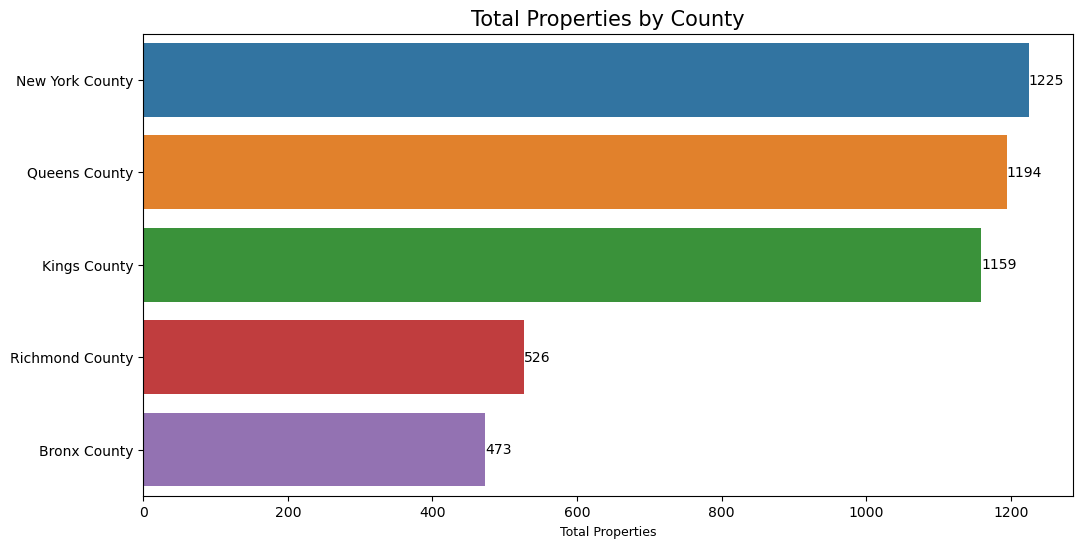

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=locality_agg, y=locality_agg.index, x="total_properties")
ax.bar_label(ax.containers[0], label_type="edge")
ax.set_title("Total Properties by County", fontsize=15)
ax.set_xlabel("Total Properties", fontsize=9)
ax.set_ylabel("")
plt.show()

In [12]:
data2 = (ny_houses.loc[ny_houses.type.isin(prop_types)]
         .groupby(["locality", "type"])
         .agg(total_properties = ("type", "count"),).unstack()
        .apply(lambda x: x * 100 / sum(x), axis=1)).round(1)
data2

total_properties                                        
type                       Co-op Condo House Multi-family home Townhouse
locality                                                                
Bronx County               34.60  8.40 25.90             28.60      2.40
Kings County               21.10 20.40 24.20             24.70      9.50
New York County            49.60 33.20  4.30              2.00     10.90
Queens County              39.10 14.70 25.70             18.30      2.30
Richmond County             1.20 11.40 61.00             19.90      6.50

In [13]:
data2.columns = data2.columns.droplevel()

In [14]:
data3 = (ny_houses.loc[ny_houses.type.isin(prop_types)]
         .groupby(["locality", "type"])
         .agg(total_properties = ("type", "count"),)).unstack()

data3

total_properties                                        
type                       Co-op Condo House Multi-family home Townhouse
locality                                                                
Bronx County                 156    38   117               129        11
Kings County                 222   215   255               260       100
New York County              570   382    50                23       125
Queens County                434   163   286               203        25
Richmond County                5    47   252                82        27

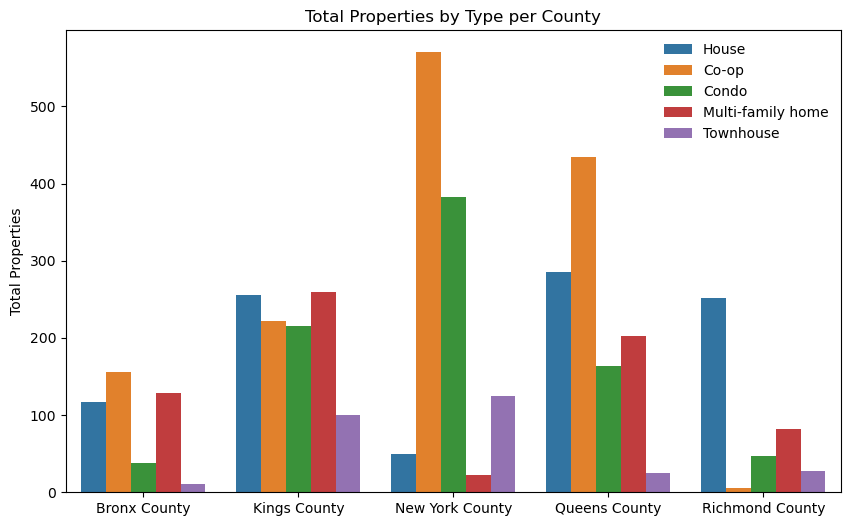

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=ny_houses.loc[ny_houses.type.isin(prop_types)], x="locality", hue="type", 
              order=["Bronx County", "Kings County", "New York County", "Queens County", "Richmond County"],
             hue_order=["House", "Co-op", "Condo", "Multi-family home", "Townhouse"])

ax.set_title("Total Properties by Type per County")
ax.set_ylabel("Total Properties")
ax.set_xlabel("")
ax.legend(frameon=False);

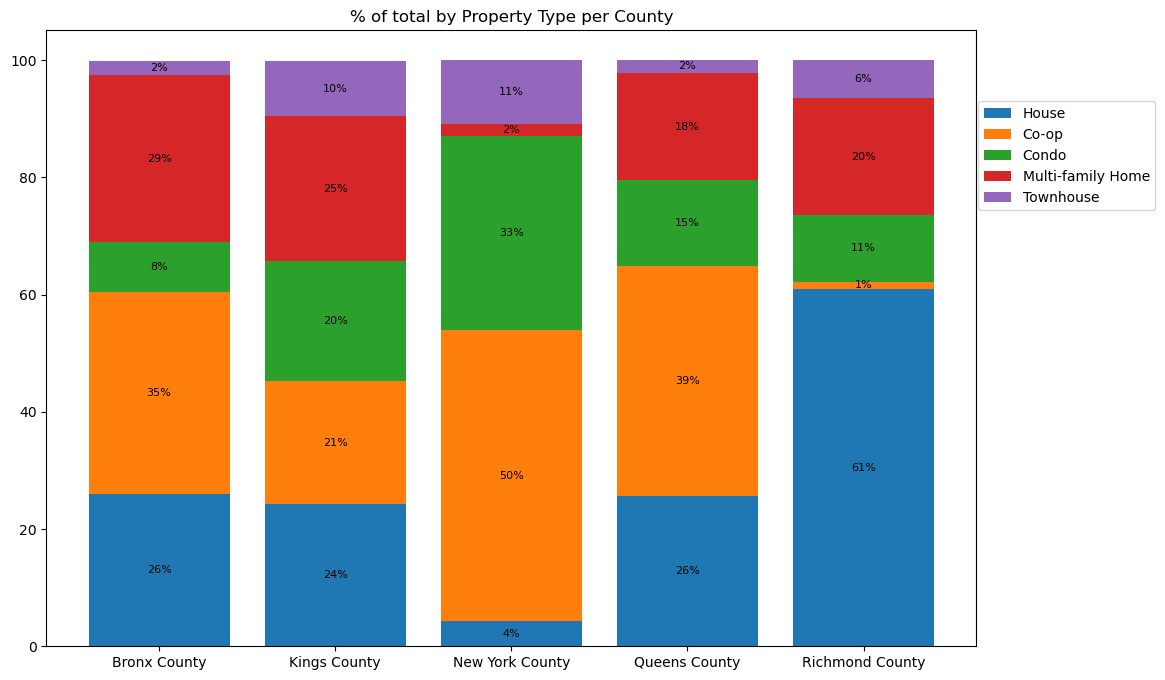

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(data2.index, data2["House"], label="House")
ax.bar(data2.index, data2["Co-op"], label="Co-op", bottom=data2["House"])
ax.bar(data2.index, data2["Condo"], label="Condo", bottom=data2["House"]+data2["Co-op"])
ax.bar(data2.index, data2["Multi-family home"], label="Multi-family Home", bottom=data2["House"]+data2["Co-op"]+data2["Condo"])
ax.bar(data2.index, data2["Townhouse"], label="Townhouse", bottom=data2["House"]+data2["Co-op"]+data2["Condo"]+data2["Multi-family home"])
ax.bar_label(ax.containers[0], label_type="center", fmt="%.0f%%", fontsize=8)
ax.bar_label(ax.containers[1], label_type="center", fmt="%.0f%%", fontsize=8)
ax.bar_label(ax.containers[2], label_type="center", fmt="%.0f%%", fontsize=8)
ax.bar_label(ax.containers[3], label_type="center", fmt="%.0f%%", fontsize=8)
ax.bar_label(ax.containers[4], label_type="center", fmt="%.0f%%", fontsize=8)

ax.set_title("% of total by Property Type per County")

fig.legend(bbox_to_anchor=(1.055, .8), ncol=1);

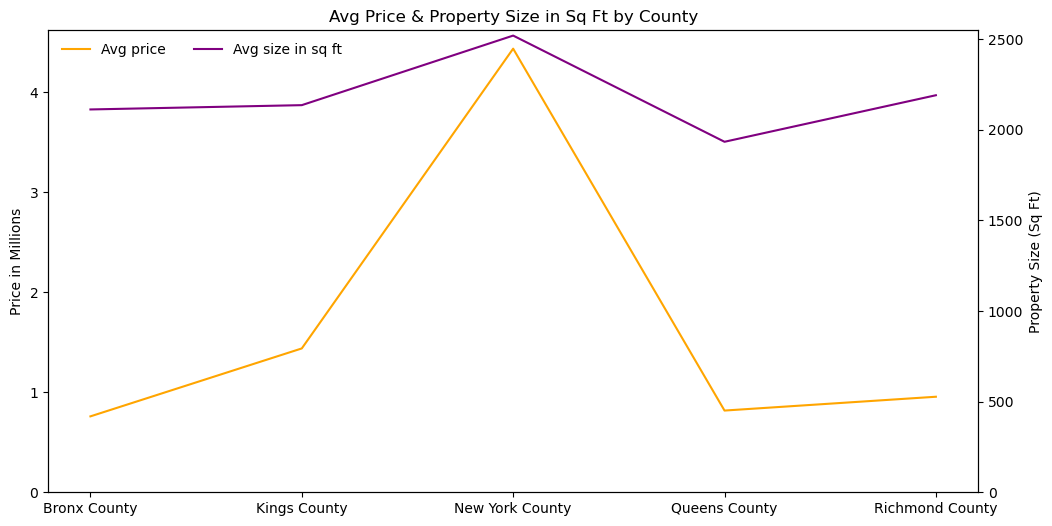

In [17]:
prop_types = ["Co-op", "House", "Condo", "Multi-family home", "Townhouse"]
data1 = ny_houses.loc[ny_houses.type.isin(prop_types)].groupby("locality").agg(avg_price = ("price", "mean"),
                                                                              avg_size = ("propertysqft", "mean"))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data1.index, data1["avg_price"] / 1000000, color="orange", label="Avg price")
ax.set_ylim(0,)
ax.set_ylabel("Price in Millions")

ax2 = ax.twinx()

ax2.plot(data1.index, data1["avg_size"], color="purple", label="Avg size in sq ft")
ax2.set_ylim(0, )
ax2.set_ylabel("Property Size (Sq Ft)")

fig.legend(bbox_to_anchor=(.38, .88), frameon=False, ncol=2)
ax.set_title("Avg Price & Property Size in Sq Ft by County");
# ax.spines["right"].set_visible(False)
# ax2.spines["right"].set_visible(False)
#ax.spines["top"].set_visible(False)
#ax2.spines["top"].set_visible(False);
# ax = sns.pointplot(data=ny_houses.loc[ny_houses.type.isin(prop_types)], x="locality", y=ny_houses["price"] / 1000000, hue="type", errorbar=None)
# ax.set_title("Avg Price by Property Type and County in 000's Dollars")
# ax.set_xlabel("")
# ax.set_ylabel("Avg. Price in $000,000s", fontsize=9)
# plt.legend()
# plt.show()

In [18]:
type_locality_psqft = ny_houses.loc[ny_houses.type.isin(prop_types)].groupby(["type", "locality"]).agg({"cost_per_sqft":"mean"}).unstack()
type_locality_psqft.columns = type_locality_psqft.columns.droplevel()
type_locality_psqft.columns.name = ""
type_locality_psqft.index.name = ""

In [19]:
type_locality_psqft

,Bronx County,Kings County,New York County,Queens County,Richmond County
,,,,,
Co-op,261.47,427.40,1055.61,251.40,328.41
Condo,404.14,922.56,1794.87,632.75,403.09
House,470.11,652.61,1812.90,553.14,494.38
Multi-family home,414.60,601.07,2486.44,574.53,409.01
Townhouse,374.59,1143.42,2410.23,782.55,380.71


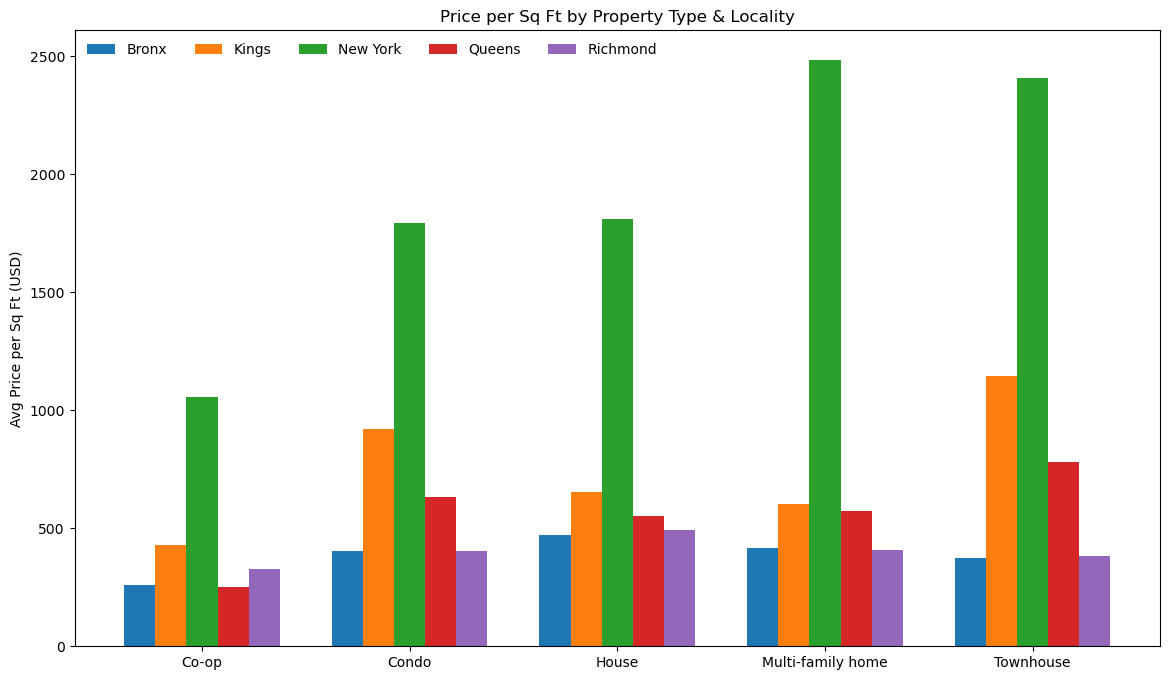

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))

width = .15

x1 = np.arange(len(type_locality_psqft))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]
x5 = [x + width for x in x4]

ax.bar(
    x1,
    type_locality_psqft["Bronx County"],
    label="Bronx",
    width=width
)

ax.bar(
    x2,
    type_locality_psqft["Kings County"],
    label="Kings",
    width=width
)

ax.bar(
    x3,
    type_locality_psqft["New York County"],
    label="New York",
    width=width
)

ax.bar(
    x4,
    type_locality_psqft["Queens County"],
    label="Queens",
    width=width
)

ax.bar(
    x5,
    type_locality_psqft["Richmond County"],
    label="Richmond",
    width=width
)

ax.set_ylabel("Avg Price per Sq Ft (USD)")
ax.legend(frameon=False, ncol=5)

ax.set_xticks(x3)
ax.set_xticklabels(type_locality_psqft.index)
ax.set_title("Price per Sq Ft by Property Type & Locality");

# Broker Analysis

In [21]:
broker_top10 = ny_houses.groupby(["broker"]).agg(
    total_properties=("broker", "count")
).nlargest(10, "total_properties").index

In [22]:
ny_avg_price = ny_houses.price.mean() / 1000000

In [23]:
ny_avg_size = ny_houses.propertysqft.mean()

In [24]:
ny_avg_cpsf = ny_houses.cost_per_sqft.mean()

In [25]:
broker_main = ny_houses.loc[ny_houses["broker"].isin(broker_top10)].groupby("broker").agg(
    avg_price=("price", "mean"),
    avg_size=("propertysqft", "mean"),
    avg_cost_psqft=("cost_per_sqft", "mean")
)

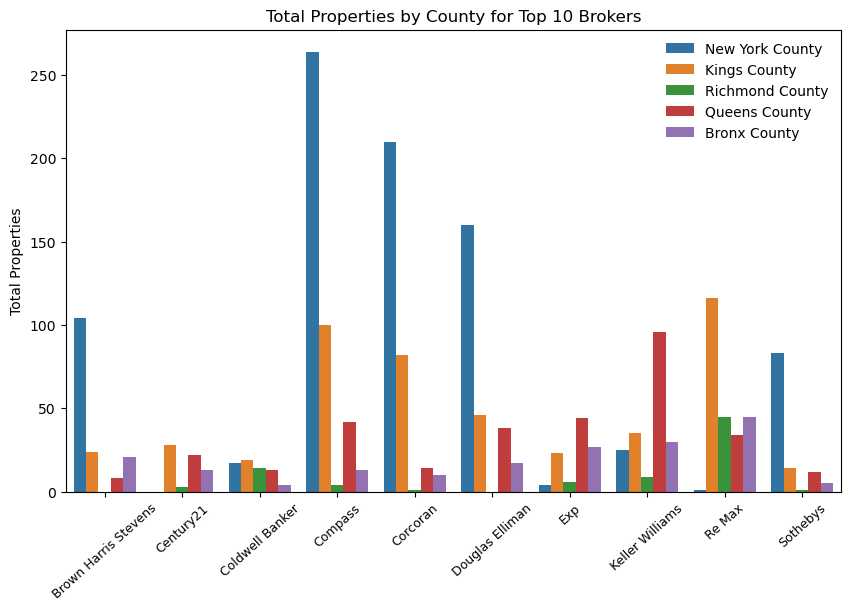

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=ny_houses.loc[(ny_houses["broker"].isin(broker_top10)) & (ny_houses.type.isin(prop_types))], x="broker", hue="locality",
             order=["Brown Harris Stevens", "Century 21", "Coldwell Banker Realty", "Compass", "Corcoran", "Douglas Elliman",
                    "Exp Realty", "Keller Williams Realty", "Re Max Real Estate Professionals", "Sotheby's International Realty"])

x = np.arange(0, len(broker_top10))

ax.set_title("Total Properties by County for Top 10 Brokers")
ax.set_ylabel("Total Properties")
ax.set_xlabel("")
ax.legend(frameon=False)
ax.set_xticks(x)
ax.set_xticklabels(["Brown Harris Stevens", "Century21", "Coldwell Banker", "Compass", "Corcoran", "Douglas Elliman",
                    "Exp", "Keller Williams", "Re Max", "Sothebys"], fontsize=9)
ax.xaxis.set_tick_params(rotation=42);

In [27]:
data4 = (ny_houses.loc[(ny_houses["broker"].isin(broker_top10)) & (ny_houses.type.isin(prop_types))]
          .groupby(["broker", "locality"])
          .agg(total_properties=("locality", "count")).unstack().fillna(0)
         .apply(lambda x: x * 100 / sum(x), axis=1).round(1)
        )

In [28]:
data4.columns = data4.columns.droplevel()

In [29]:
data4.columns.name = ""
data4.index.name = ""

In [30]:
data4

,Bronx County,Kings County,New York County,Queens County,Richmond County
,,,,,
Brown Harris Stevens,13.40,15.30,66.20,5.10,0.00
Century 21,19.70,42.40,0.00,33.30,4.50
Coldwell Banker Realty,6.00,28.40,25.40,19.40,20.90
Compass,3.10,23.60,62.40,9.90,0.90
Corcoran,3.20,25.90,66.20,4.40,0.30
Douglas Elliman,6.50,17.60,61.30,14.60,0.00
Exp Realty,26.00,22.10,3.80,42.30,5.80
Keller Williams Realty,15.40,17.90,12.80,49.20,4.60
Re Max Real Estate Professionals,18.70,48.10,0.40,14.10,18.70


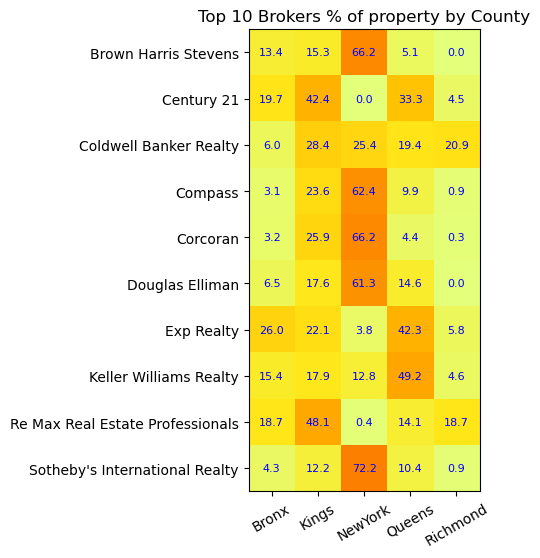

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.imshow(data4, cmap="Wistia")
ax.set_title("Top 10 Brokers % of property by County")
ax.set_xticks(np.arange(len(data4.columns)), ["Bronx", "Kings", "NewYork", "Queens", "Richmond"])
ax.xaxis.set_tick_params(rotation=30)
ax.set_yticks(np.arange(len(data4.index)), data4.index)

for i in range(len(data4.index)):
    for j in range(len(data4.columns)):
        text = ax.text(j, i, data4.iloc[i, j],
                       ha="center", va="center", color="b", fontsize=8);

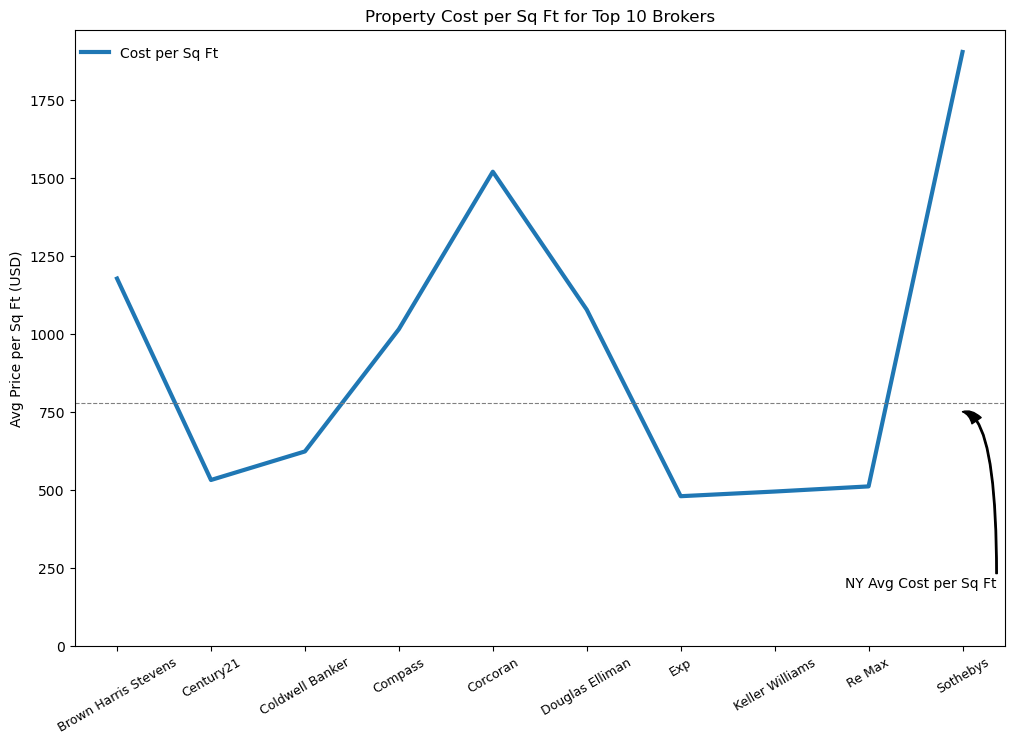

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(0, len(broker_top10))

ax.plot(broker_main.index, broker_main["avg_cost_psqft"], label="Cost per Sq Ft", linewidth=3)
ax.set_ylabel("Avg Price per Sq Ft (USD)")
ax.set_ylim(0, )
ax.axhline(y=ny_avg_cpsf, color="grey", ls="--", linewidth=.8)
#ax.text(8.85, 900, "NY Avg")

ax.annotate(text="NY Avg Cost per Sq Ft", xy=(9, 750), xytext=(7.75, 200),
           arrowprops=dict(facecolor="black", 
                          width=1,
                          headwidth=8,
                          connectionstyle="angle3, angleA=270, angleB=0"),
           verticalalignment="center"
           )


ax.set_xticks(x)
ax.set_xticklabels(["Brown Harris Stevens", "Century21", "Coldwell Banker", "Compass",
                   "Corcoran", "Douglas Elliman", "Exp", "Keller Williams", "Re Max", "Sothebys"], fontsize=9)
ax.xaxis.set_tick_params(rotation=30)

ax.set_title("Property Cost per Sq Ft for Top 10 Brokers")
fig.legend(bbox_to_anchor=(.255, .875), frameon=False);

In [33]:
# fig, ax = plt.subplots(figsize=(12,8))

# x = np.arange(0, len(broker_top10))

# ax.bar(data4.index, data4["New York County"], label="New York County")
# ax.bar(data4.index, data4["Queens County"], label="Queens County", 
#        bottom=data4["New York County"])
# ax.bar(data4.index, data4["Kings County"], label="Kings County", 
#        bottom=data4["New York County"]+data4["Queens County"])
# ax.bar(data4.index, data4["Richmond County"], label="Richmond County", 
#        bottom=data4["New York County"]+data4["Queens County"]+data4["Kings County"])
# ax.bar(data4.index, data4["Bronx County"], label="Bronx County", 
#        bottom=data4["New York County"]+data4["Queens County"]+data4["Kings County"]+data4["Richmond County"])
# ax.bar_label(ax.containers[0], label_type="center", fmt="%.0f%%", fontsize=7)
# ax.bar_label(ax.containers[1], label_type="center", fmt="%.0f%%", fontsize=7)
# ax.bar_label(ax.containers[2], label_type="center", fmt="%.0f%%", fontsize=7)
# ax.bar_label(ax.containers[3], label_type="center", fmt="%.0f%%", fontsize=7)
# ax.bar_label(ax.containers[4], label_type="center", fmt="%.0f%%", fontsize=7)

# ax.set_xticks(x)
# ax.set_xticklabels(["Brown Harris Stevens", "Century21", "Coldwell Banker", "Compass",
#                    "Corcoran", "Douglas Elliman", "Exp", "Keller Williams", "Re Max", "Sothebys"], fontsize=9)
# ax.xaxis.set_tick_params(rotation=30)

# ax.set_title("% of total by County per Top 10 Broker")

# fig.legend(bbox_to_anchor=(1.055, .8), ncol=1);

In [34]:
# top10_broker_count = 
# ny_houses.loc[ny_houses["broker"].isin(broker_top10)].groupby(["broker", "locality"]).agg(
#     total_properties=("broker", "count"))